# Simple Linear Regression

#### Import important libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

#### Import the Dataset

In [19]:
df = pd.read_csv('height-weight.csv')
df.head(1)

,Weight,Height
0,45,120


#### Train-Test split

In [20]:
x = df[['Weight']]
y = df[['Height']]

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20, random_state=42)

#### Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [23]:
import pickle
with open("scaler.pkl", 'wb') as file:
    pickle.dump(scaler,file)

## LinearRegression

In [24]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
y_pred = linear_model.predict(x_test)

In [25]:
with open("model.pkl", 'wb') as file:
    pickle.dump(linear_model,file)

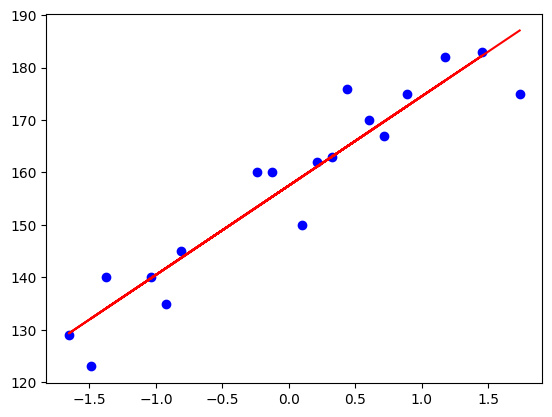

In [26]:
plt.plot(x_train,linear_model.predict(x_train), color = 'red') # Best-fit line
plt.scatter(x_train,y_train, color = 'blue') # Actual points

plt.show()

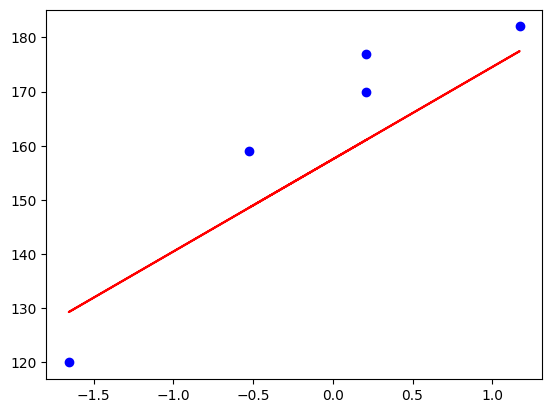

In [27]:
plt.plot(x_test,linear_model.predict(x_test), color = 'red') # Best-fit line
plt.scatter(x_test,y_test, color = 'blue') # Actual points

plt.show()

#### Performance Matrics (MSE, MAE, RMSE, R2, Adjusted R2)

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse)
print(mae)
print(rmse)
print(r2)

109.77592599051664
9.822657814519232
10.477400726827081
0.776986986042344


In [29]:
x_test.shape

(5, 1)

In [30]:
N = x_test.shape[0] # No. of rows
p = x_test.shape[1] # No.of independent variable
adj_r2 = ((1-r2)*(N-1))/(N-p-1)
adj_r2

0.29735068527687475

#### Testing with new data

In [31]:
weight = float(input("Enter your Weight")) # 80
new_weight_df = pd.DataFrame([weight], columns=['Weight'])
new_weight_df = scaler.transform(new_weight_df)
new_pred_height = linear_model.predict(new_weight_df)
print("Predicted Height in cm is: ", new_pred_height[0][0])

Predicted Height in cm is:  163.01076265919562
